In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
#读取数据
train_data0=pd.read_table('./data/zhengqi_train.txt',sep='\t')
test_data0=pd.read_table('./data/zhengqi_test.txt',sep='\t')

In [3]:
#训练数据总览
train_data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
# 没有空缺值，由于指标的含义暂不清晰，异常值不进行处理

train_data0.describe()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
count,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,...,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000,2888.000000
mean,0.123048,0.056068,0.289720,-0.067790,0.012921,-0.558565,0.182892,0.116155,0.177856,-0.169452,...,0.097648,0.055477,0.127791,0.020806,0.007801,0.006715,0.197764,0.030658,-0.130330,0.126353
std,0.928031,0.941515,0.911236,0.970298,0.888377,0.517957,0.918054,0.955116,0.895444,0.953813,...,1.061200,0.901934,0.873028,0.902584,1.006995,1.003291,0.985675,0.970812,1.017196,0.983966
min,-4.335000,-5.122000,-3.420000,-3.956000,-4.742000,-2.182000,-4.576000,-5.048000,-4.692000,-12.891000,...,-2.912000,-4.507000,-5.859000,-4.053000,-4.627000,-4.789000,-5.695000,-2.608000,-3.630000,-3.044000
25%,-0.297000,-0.226250,-0.313000,-0.652250,-0.385000,-0.853000,-0.310000,-0.295000,-0.159000,-0.390000,...,-0.664000,-0.283000,-0.170250,-0.407250,-0.499000,-0.290000,-0.202500,-0.413000,-0.798250,-0.350250
50%,0.359000,0.272500,0.386000,-0.044500,0.110000,-0.466000,0.388000,0.344000,0.362000,0.042000,...,-0.023000,0.053500,0.299500,0.039000,-0.040000,0.160000,0.364000,0.137000,-0.185500,0.313000
75%,0.726000,0.599000,0.918250,0.624000,0.550250,-0.154000,0.831250,0.782250,0.726000,0.042000,...,0.745250,0.488000,0.635000,0.557000,0.462000,0.273000,0.602000,0.644250,0.495250,0.793250
max,2.121000,1.918000,2.828000,2.457000,2.689000,0.489000,1.895000,1.918000,2.245000,1.335000,...,4.580000,2.689000,2.013000,2.395000,5.465000,5.110000,2.324000,5.238000,3.000000,2.538000


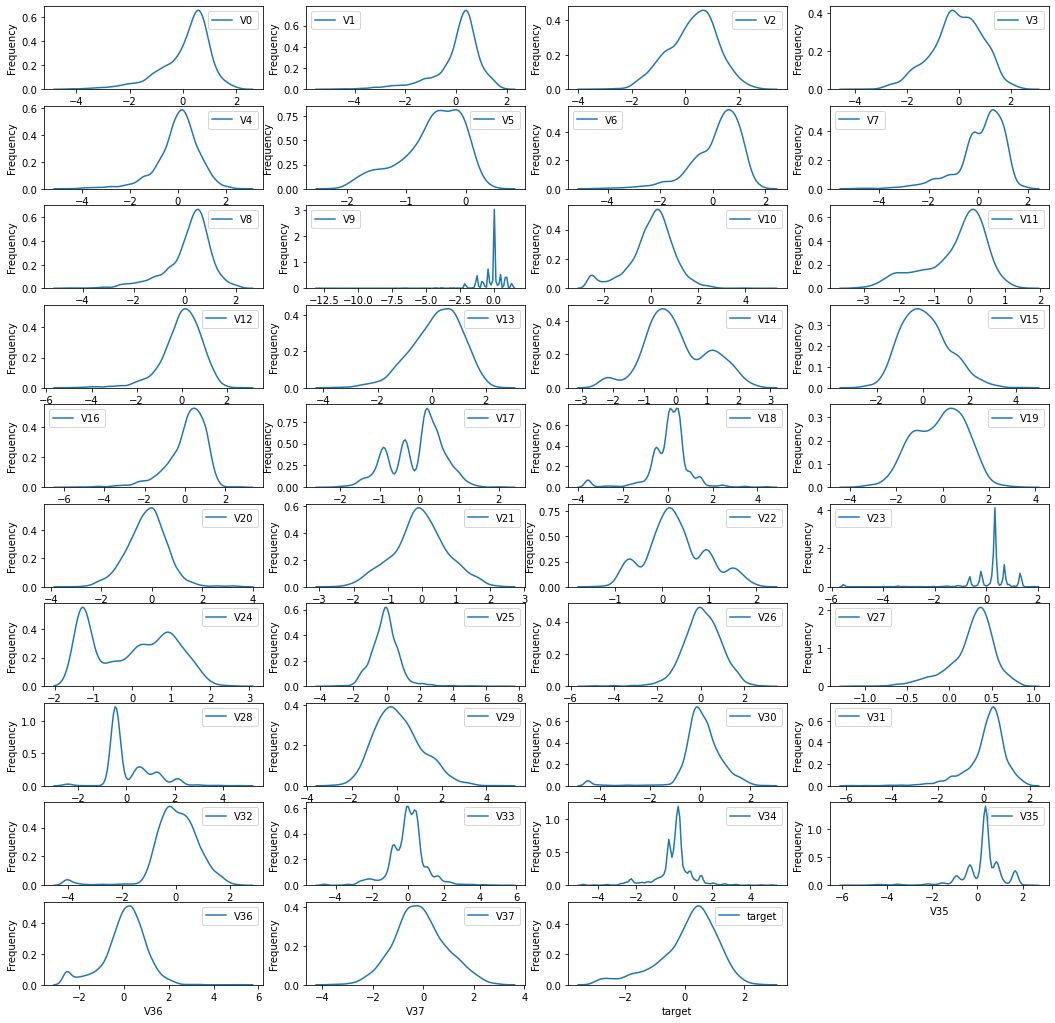

In [5]:
#训练数据分布情况
plt.figure(figsize=(18, 18))

for column_index, column in enumerate(train_data0.columns):
    plt.subplot(10, 4, column_index + 1)
    g=sns.kdeplot(train_data0[column])
    g.set_xlabel(column)
    g.set_ylabel('Frequency')

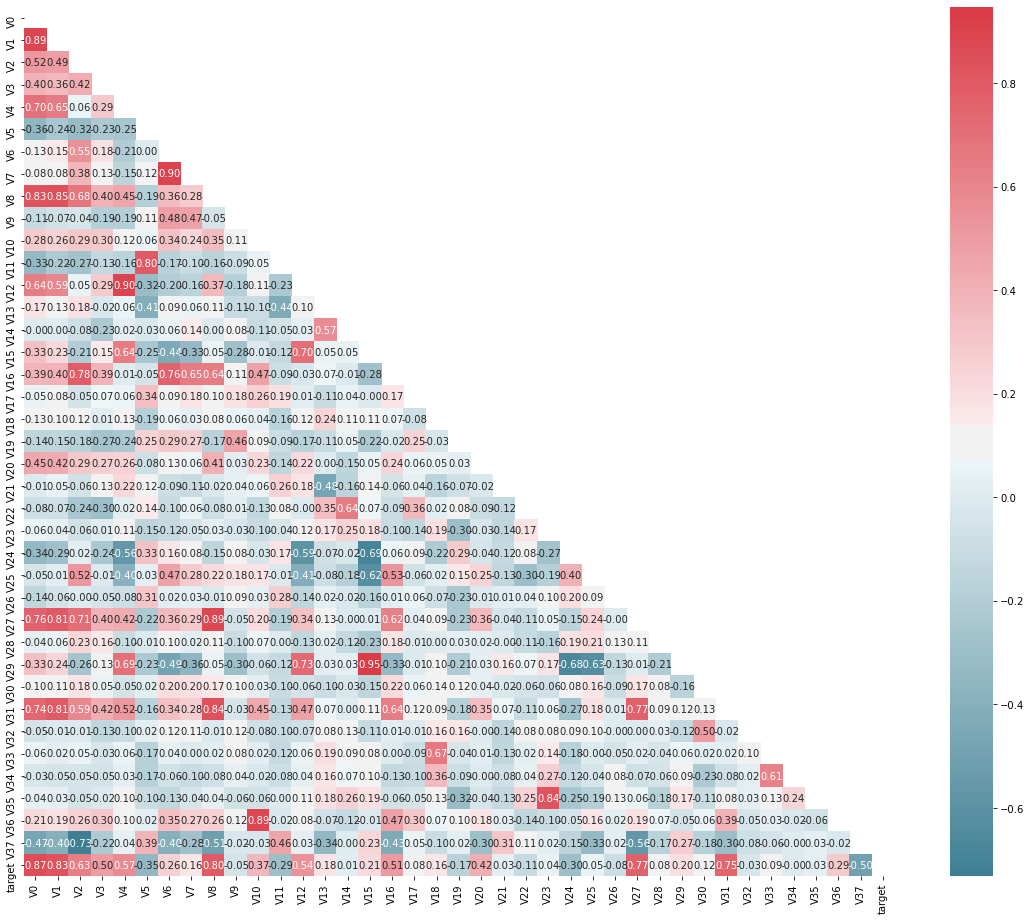

In [6]:
#特征相关性
plt.figure(figsize=(20, 16))
colnm = train_data0.columns.tolist()
mcorr = train_data0[colnm].corr(method="spearman")
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g = sns.heatmap(mcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
plt.show()

In [7]:
mcorr=mcorr.abs()
numerical_corr=mcorr[mcorr['target']>0.1]['target']
print(numerical_corr.sort_values(ascending=False))
index0 = numerical_corr.sort_values(ascending=False).index
print(train_data0[index0].corr('spearman'))

target    1.000000
V0        0.866709
V1        0.832457
V8        0.799280
V27       0.765133
V31       0.749034
V2        0.630160
V4        0.574775
V12       0.542429
V16       0.510025
V3        0.501114
V37       0.497162
V20       0.420424
V10       0.371067
V5        0.345683
V24       0.296056
V11       0.293261
V36       0.287696
V6        0.264778
V15       0.213490
V29       0.198244
V13       0.177317
V19       0.171120
V7        0.164981
V18       0.162710
V30       0.123423
V22       0.112248
Name: target, dtype: float64
          target        V0        V1        V8       V27       V31        V2  \
target  1.000000  0.866709  0.832457  0.799280  0.765133  0.749034  0.630160   
V0      0.866709  1.000000  0.894256  0.831926  0.763410  0.738433  0.517319   
V1      0.832457  0.894256  1.000000  0.848793  0.807414  0.806790  0.490908   
V8      0.799280  0.831926  0.848793  1.000000  0.886859  0.841188  0.676597   
V27     0.765133  0.763410  0.807414  0.886859  1.000000  

In [8]:
# 自变量与目标变量相关性绝对值0.1以上的有：
# V0,V1,V2,V3,V4,V5,V6,V7,V8,V10,V11,V12,V13,V15,V16,V18,V19,V20,V22,V23,V24,V27,V29,V30,V31,V36,V37
# 自变量相关性0.8以上的有：
# V0: V1 V8 ;
# V1: V8 V27 V31;
# V4: V12;
# V5: V11;
# V6: V7;
# V8: V27 V31 ;
# V10: V36;
# V15: V29;
# V23: V35;
# 于是，选取特征自变量与目标变量相关性绝对值0.1以上并且剔除高度相关性的自变量。

train_data1=train_data0[['V1','V2','V3','V4','V5','V6','V10','V13','V15',
'V16','V18','V19','V20','V22','V23','V24','V30','V37','target']]
train_data1.head()

,V1,V2,V3,V4,V5,V6,V10,V13,V15,V16,V18,V19,V20,V22,V23,V24,V30,V37,target
0,0.016,-0.143,0.407,0.452,-0.901,-1.812,-0.940,0.550,0.000,-1.707,-0.573,-0.991,0.610,-0.063,0.356,0.800,0.109,-3.508,0.175
1,0.437,0.066,0.566,0.194,-0.893,-1.566,0.188,1.109,0.000,-0.977,-0.571,-0.836,0.588,-0.063,0.357,0.801,0.124,-0.730,0.676
2,0.568,0.235,0.370,0.112,-0.797,-1.367,0.874,0.767,-0.212,-0.618,-0.564,-0.558,0.576,-0.063,0.355,0.961,0.361,-0.589,0.633
3,0.368,0.283,0.165,0.599,-0.679,-1.200,0.011,0.769,-0.162,-0.429,-0.574,-0.564,0.272,-0.063,0.352,1.435,0.417,-0.112,0.206
4,0.638,0.260,0.209,0.337,-0.454,-1.073,-0.251,-0.349,-0.138,-0.391,-0.572,-0.394,0.106,-0.259,0.352,0.881,1.078,-0.028,0.384


In [9]:
#多重共线性
new_numerical=['V1','V2','V3','V4','V5','V6','V10','V13','V15',
'V16','V18','V19','V20','V22','V23','V24','V30','V37']
X=np.matrix(train_data1[new_numerical])
VIF_list=[variance_inflation_factor(X, i) for i in range(X.shape[1])]
VIF_list

[4.022395550356531,
 8.239128641236116,
 1.6420006943718182,
 3.927282997385261,
 2.1571002768076535,
 5.3472633494262745,
 1.7299591336932447,
 1.8315761158812087,
 3.11511186938201,
 9.926503438916924,
 1.6639075679486484,
 1.5321128873724281,
 1.4665430621660964,
 1.5565328006403367,
 1.6171543940768809,
 2.2201322880495677,
 1.5190591516247698,
 4.3193929090251615]

In [10]:
# 多重共线性不明显，暂不需要进一步降维处理。为了降低个别特征较大波动，有可能造成不同特征权重系数变化过大，将数据进行z-score标准化。

train0=train_data1.iloc[:,0:-1]
test0=test_data0[['V1','V2','V3','V4','V5','V6','V10','V13','V15',
'V16','V18','V19','V20','V22','V23','V24','V30','V37']]
target=train_data1.iloc[:,-1]
train=(train0-np.mean(train0,axis=0))/np.std(train0,axis=0)
test=(test0-np.mean(test0,axis=0))/np.std(test0,axis=0)

In [11]:
# 预测模型探索

train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)
m=RandomForestRegressor()
m.fit(train_data, train_target)
score=mean_squared_error(test_target,m.predict(test_data))
print(score)

0.13646395325259517


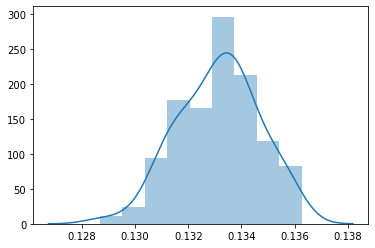

In [12]:
# 多次重复，查看模型预测结果的稳定性

model_accuracies = []

for repetition in range(100):
    train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

    m=RandomForestRegressor()
    m.fit(train_data, train_target)
    score=mean_squared_error(test_target,m.predict(test_data))
    model_accuracies.append(score)

sns.distplot(model_accuracies)

In [19]:
# 模型参数调优

param_grid = {'n_estimators':[1,5,10,25,50,100],
'max_features':('auto','sqrt','log2')}
m = GridSearchCV(RandomForestRegressor(),param_grid)
m=m.fit(train_data,train_target)
score=mean_squared_error(test_target,m.predict(test_data))
print(score)
print(m.best_score_)
print(m.best_params_)

0.13449637250034602
0.865835600480889
{'max_features': 'log2', 'n_estimators': 100}


In [20]:
m = RandomForestRegressor(n_estimators=100,max_features='log2')
m.fit(train_data, train_target)
predict = m.predict(test)
np.savetxt('predict.txt',predict)